![](https://witsq.github.io/images/banner.png)

<h1 style="font-size:72px;">Qiskit Workflow</h1>

_Conrad J. Haupt, WitsQ Team_


In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, BasicAer
from qiskit import Aer
from qiskit.compiler import transpile
from qiskit.extensions import RXGate, CnotGate, XGate
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

# Building a Circuit

In [2]:
# Here we initialise our quantum and classical register
qr_1 = QuantumRegister(3)
cr_1 = ClassicalRegister(3)

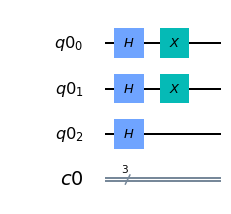

In [3]:
# Construct the circuit
circ_1 = QuantumCircuit(qr_1, cr_1)
circ_1.draw(output='mpl')

# Add some gates
circ_1.h([0,1,2])
# circ_1.h(qr_1)

circ_1.x([0,1])
# circ_1.x(qr_1)

# Draw!
circ_1.draw(output='mpl')

## Ex. 1: Comment lines 6 and 9 and uncomment lines 7 and 10 in the above cell and describe below what happened to the output circuit

An X gate appeared on $q0_2$ as ```circ_1.x(qr_1)``` applies the gate to the entire register.

## Ex. 2: Build the following circuit using the following gates

1. Y Gate
2. CX gate
3. RY Gate
4. Hadamard Gate

The Qiskit documentation is found at https://qiskit.org/documentation/index.html

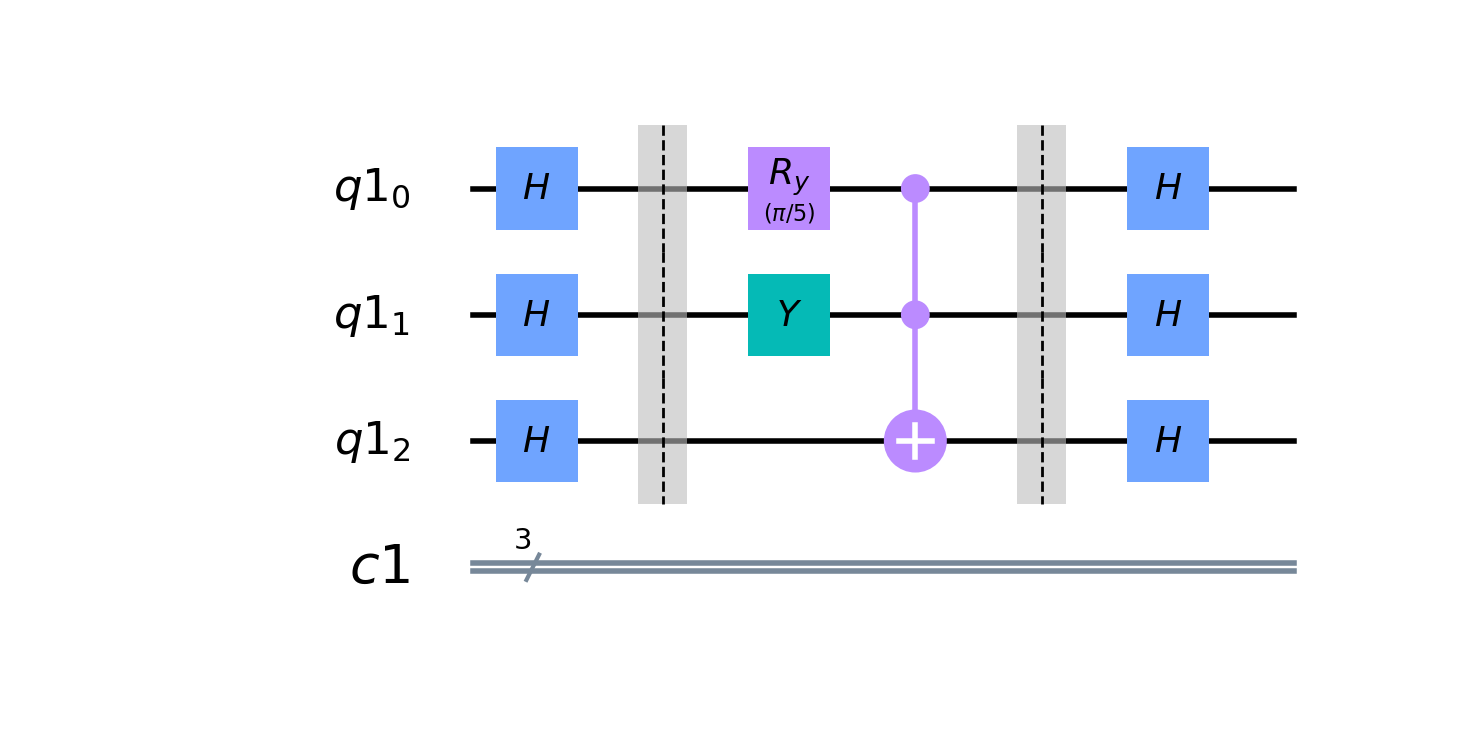

In [4]:
from IPython.display import Image
Image(filename="circuit_1.png")

In [5]:
# DO NOT EDIT THIS CELL
qr_2 = QuantumRegister(3)
cr_2 = ClassicalRegister(3)

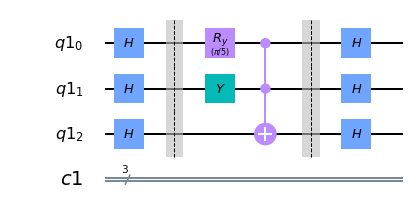

In [6]:
# Add your gates to circ_2
circ_2 = QuantumCircuit(qr_2,cr_2)

###################################
circ_2.h(qr_2)
circ_2.barrier()
circ_2.ry(np.pi/5,qr_2[0])
circ_2.y(qr_2[1])
circ_2.ccx(qr_2[0],qr_2[1],qr_2[2])
circ_2.barrier()
circ_2.h(qr_2)
###################################

circ_2.draw(output='mpl')

# Let's build a generic circuit with a parameter

In [7]:
from qiskit.circuit import Parameter

In [8]:
qr_3 = QuantumRegister(5)
cr_3 = ClassicalRegister(5)

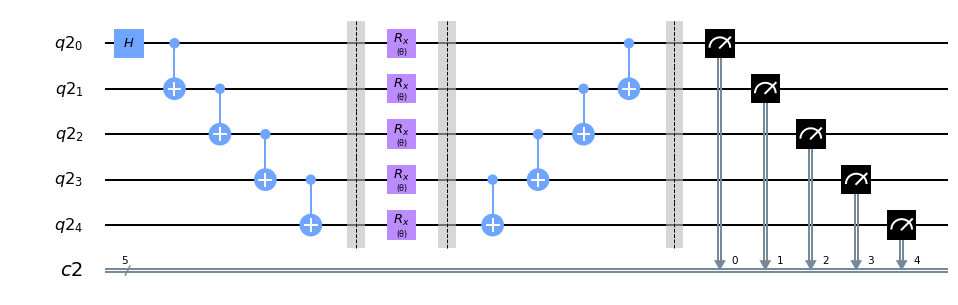

In [9]:
circ_3 = QuantumCircuit(qr_3,cr_3)
circ_3.h(0)

# Add CNOT gates for some pairs of qubits in the circuit
for iq_c,iq_x in zip(qr_3[:-1],qr_3[1:]):
    circ_3.cx(iq_c,iq_x)


circ_3.barrier()
param_theta = Parameter('θ') # Note: The string uses unicode characters

###########################################################
# EX. 3: Add duplicate rx gates to the remaining 4 qubits #
###########################################################

# By applying rx() to qr_3, we get an Rx gate on each qubit in that register
circ_3.rx(param_theta,qr_3)

###########################################################
circ_3.barrier()

    
# Add final CNOT gates
for iq_c,iq_x in reversed([a for a in zip(qr_3[:-1],qr_3[1:])]):
    circ_3.cx(iq_c,iq_x)

circ_3.barrier()
    
circ_3.measure(qr_3,cr_3)

circ_3.draw(output='mpl')

# Bind the parameter and simulate the circuit

In [10]:
# This is an example on how to bind a circuit parameter to a value
# theta_circuits_pi_temp = circ_3.bind_parameters({param_theta: np.pi/5})

##########################################################
# Ex. 4: Bind your circuit to the following theta values #
#  and store the output circuits, one per theta value.   #
##########################################################

theta_values = [np.pi/5, np.pi*2/5, np.pi*3/5, np.pi*4/5]

# Modify this line
theta_circuits = [circ_3.bind_parameters({param_theta: value}) for value in theta_values]

## Simulate each circuit


In [11]:
from qiskit import BasicAer
from qiskit.visualization import plot_histogram

In [12]:
backend = BasicAer.get_backend('qasm_simulator')
results = [execute(circ,backend).result() for circ in theta_circuits]

## Ex. 5: Plot the results of some of the results using plot_histogram

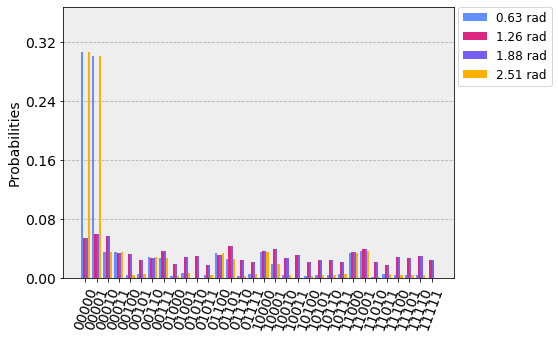

In [13]:
#### Remember that plot_histogram() takes the output of get_counts() as the argument
plot_histogram(
    [r.get_counts() for r in results],
    legend=[str(np.around(val,2)) + ' rad' for val in theta_values],
    bar_labels=False
)

Notice how 0.63 and 2.51 radians give similar distributions? This is because 0.63 ~= pi - 2.51.

# Sub-Circuits
We can store a circuit as a building block by encapsulating it into a sub-circuit. This is done as following.

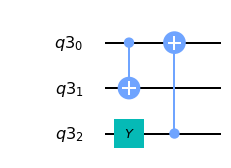

In [14]:
# This is an example circuit that we want to use multiple times
# NOTE THAT WE ARE NOT USING A CLASSICAL REGISTER
qr_4 = QuantumRegister(3)
circ_4 = QuantumCircuit(qr_4, name='ourSubBlock')

circ_4.cx(0,1)
circ_4.y(2)
circ_4.cx(2,0)

circ_4.draw(output='mpl')

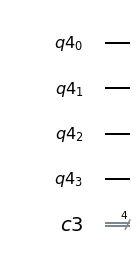

In [15]:
# This is the circuit in which we want to use our smaller sub-circuit
qr_5 = QuantumRegister(4)
cr_5 = ClassicalRegister(4)
circ_5 = QuantumCircuit(qr_5,cr_5)

circ_5.draw(output='mpl')

### Add the sub-circuit to the larger parent circuit

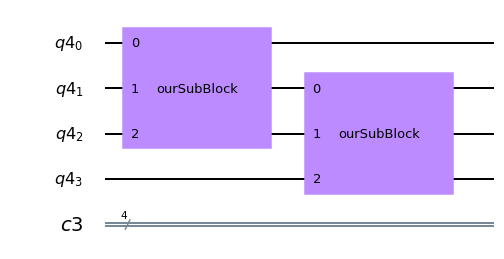

In [16]:

sub_circ_4 = circ_4.to_instruction()
# Apply our block

circ_5.append(sub_circ_4,qr_5[0:3])
circ_5.append(sub_circ_4,qr_5[1:4])

circ_5.draw(output='mpl')

## We can see the full circuit by decomposing the parent circuit

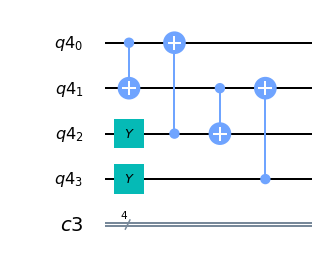

In [17]:
circ_5.decompose().draw(output='mpl')

# Ex. 6: Build a teleportation circuit as a sub-circuit and apply it to circ_5

In [18]:
# Build your circuit here
qr_info = QuantumRegister(1,name='info')
qr_alice = QuantumRegister(1,name='alice')
qr_bob = QuantumRegister(1,name='bob')
cr_tele = ClassicalRegister(3)

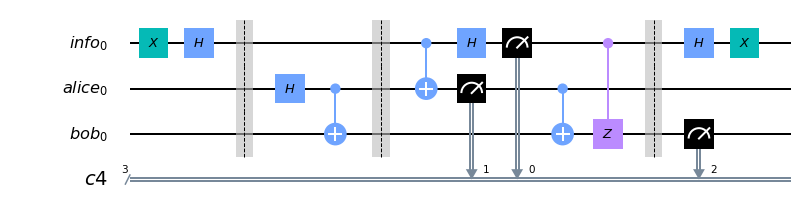

In [19]:
circ_tele = QuantumCircuit(qr_info,qr_alice,qr_bob,cr_tele)

# Create our secret quantum state
circ_tele.x(qr_info)
circ_tele.h(qr_info)
circ_tele.barrier()

# Create the entangled pair between Alice and Bob
circ_tele.h(qr_alice)
circ_tele.cx(qr_alice,qr_bob)
circ_tele.barrier()

# Teleportation circuit
circ_tele.cx(qr_info, qr_alice)
circ_tele.h(qr_info)
circ_tele.measure(qr_info, cr_tele[0])
circ_tele.measure(qr_alice, cr_tele[1])
circ_tele.cx(qr_alice, qr_bob)
circ_tele.cz(qr_info, qr_bob)
circ_tele.barrier()

# To show that the state has been measured, we reverse the qr_info gates
circ_tele.h(qr_bob)
circ_tele.x(qr_bob)

# Then we measure. bob's qubits should only measure as |0>.
circ_tele.measure(qr_bob,cr_tele[2])

# Draw
circ_tele.draw(output='mpl')

In [20]:
# Simulate on the statevector simulator
statevector_simulator = Aer.get_backend('statevector_simulator')
statevector_res = execute(circ_tele,statevector_simulator)
print(statevector_res.result().get_statevector())

[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]


{'010': 122, '001': 133, '000': 123, '101': 142, '111': 127, '100': 123, '011': 135, '110': 119}


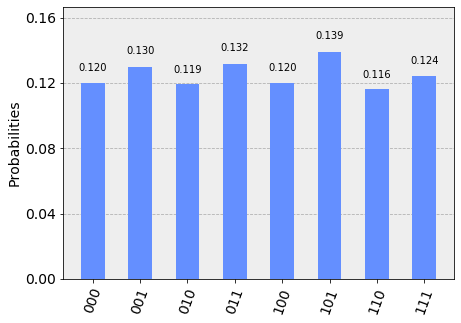

In [21]:
# Simulate on the 
qasm_simulator = Aer.get_backend('qasm_simulator')
qasm_res = execute(circ_tele,qasm_simulator)
print(qasm_res.result().get_counts())
plot_histogram(qasm_res.result().get_counts())